# Problem 1

In order to compute the polynomial $P_2(x)$, we first note that the three ordered pairs are $(x_0,f_0) = (0, 1)$, $(x_1,f_1) = (1,1)$, and $(x_2,f_2) = (3, -5)$. From class, we know that the polynomial $P_2(x)$ may be expressed as follows:
$$P_2(x) = \sum_{j=0}^2 f_j \ell_j(x) = \ell_0(x) + \ell_1(x) - 5\ell_2(x)$$ Now, we note that
$$\ell_0(x) = \frac{\prod_{k\neq 0} (x-x_k)}{\prod_{k\neq 0} (x_0 - x_k)} = \frac{(x-x_1)(x-x_2)}{(x_0-x_1)(x_0-x_2)} = \frac{(x-1)(x-3)}{(0-1)(0-3)} = \frac{1}{3}(x-1)(x-3)$$ and
$$\ell_1(x) = \frac{\prod_{k\neq 1} (x-x_k)}{\prod_{k\neq 1} (x_1 - x_k)} = \frac{(x-x_0)(x-x_2)}{(x_1-x_0)(x_1-x_2)} = \frac{(x)(x-3)}{(1-0)(1-3)} = -\frac{1}{2}(x)(x-3)$$ and
$$\ell_2(x) = \frac{\prod_{k\neq 2} (x-x_k)}{\prod_{k\neq 2} (x_2 - x_k)} = \frac{(x-x_0)(x-x_1)}{(x_2-x_0)(x_2-x_1)} = \frac{(x)(x-1)}{(3-0)(3-1)} = \frac{1}{6}(x)(x-1)$$ so that
$$P_2(x) = \ell_0(x) + \ell_1(x) - 5\ell_2(x) = \frac{1}{3}(x-1)(x-3) -\frac{1}{2}(x)(x-3) - \frac{5}{6}(x)(x-1) = 1 + x - x^2$$
Now, we compute
$$f(2) = P_2(2) = 1 + 2 - 2^2 = -1$$

# Problem 2

In [201]:
#Part A of Problem 2
# This function computes the lambdas corresponding to an array full of x_js. The input is the array full of x_js and the output will
# be the array full of lambda_js
def lambdas(arr1):
    #Define the array that will eventually be returned
    arr2 = []
    #iterate through every number in the input array. we are assuming that num is x_j
    for num in arr1:
        #Make a copy of the array without the number num. That is, temparr consists of all the x_ks,
        temparr = arr1.copy()
        temparr.remove(num)
        #Set the product to be equal to 1
        prod = 1
        #iterate through every number in temparr. this goes through all of the x_ks
        for val in temparr:
            #for each x_k, we multiply the product by x_j-x_k
            prod = prod*(num - val)
        #once we have multiplied all terms of the form x_j - x_k, we invert the product to ensure that we get the right answer
        prod = 1/prod
        #append this product to the array which contains all of the lambda_js
        arr2.append(prod)
    #return the array that contains all of the lambda_js
    return arr2

#This function computes the actual approximation. the inputs are the array of x_j and the array of f_j and the value for the function
#the output is the approximation
def approx(xs,fs,val):
    #First we must check whether or not the val is in the array xs (the array of x values). 
    #if it is, we simply return the corresponding value in the array fs (the array of f values)
    if val in xs:
        return fs[xs.index(val)]
    #Here we compute the array of lambda_js which will be necessary to compute the approximation
    ls = lambdas(xs)
    #define the numerator of the sum
    numerator = 0
    #define the denominator of the sum
    denominator = 0
    #this for loop sums up all the terms necessary to compute the numerator
    for i in range(0, len(xs)):
        numerator += (ls[i]/(val - xs[i])) * fs[i]
    #this for loop sums up all the terms necessary to compute the denominator
    for i in range(0, len(xs)):
        denominator += ls[i]/(val - xs[i])
    #this computes the final answer
    ans = numerator/denominator
    #return the final answer
    return ans
#test the code by redoing the first problem and evaluating the polynomial at 2
print("Testing code")
print(approx([0,1,3],[1,1,-5],2)) #the answer should be -1, as it was in the first problem



Testing code
-0.9999999999999998


In [202]:
#Part B of Problem 2
#define the array containing all of the x values
xval = [0,0.25,0.5,0.75,1.25,1.5]
#define the array containing all of the y values
yval = [0,0.7071,1,0.7071,-0.7071,-1]
#print the approximation at the x value 2
print("Approximation for Part B of Problem 2")
print(approx(xval,yval,2))

Approximation for Part B of Problem 2
0.8519999999999989


# Problem 3

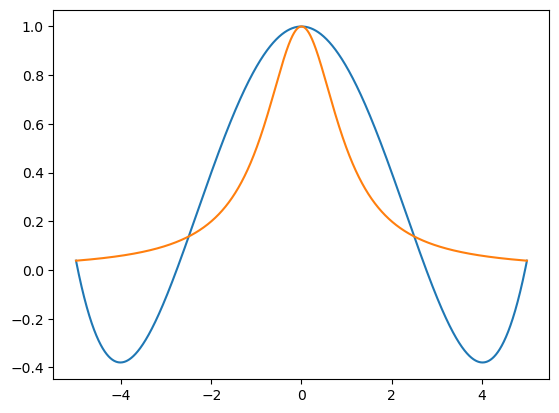

In [204]:
import math
import matplotlib.pyplot as plt
# Part A of Problem 3

#define the function that we will be approximating. The input to this function is x and the output is the output of the function
def myfunc(val):
    return 1/(1+val**2)

#defining a function to find the appropriate x values given a number n
def findxvals(n):
    #Fill up the matrix xvals with appropriate values of x
    for x in range(0,n+1):
        xvals.append(-5+x*(10/n))


#Since the x values are equidistributed for this problem, we can use the special formula to compute the appropriate lambda values
#define the function that will find all the lambda values
def findlvals(n):
    for x in range(0,n+1):
        #Here we are appending (-1)^x times the binomial coefficient (n x)
        lvals.append(((-1)**x)*(math.factorial(n)/(math.factorial(x)*math.factorial(n-x))))


#define the function that will find all of the function values. This takes n (number of steps) and f (actual function) as inputs.
def findfvals(n,f):
    for x in range(0,n+1):
        #here we add the function values to the fvals array
        fvals.append(f(xvals[x]))

#First we do the approximation for Part A of Problem 3 with n = 4

#Define the variable n to be 4
n=4

#Initialize the matrix containing the x values
xvals = []


#Call the function findxvals to fill the matrix with the appropriate values
findxvals(n)


#Initialize the matrix containing all of the lambda values
lvals = []


#Call the function findlvals to fill the matrix with the appropriate values
findlvals(n)

#Initialize the matrix that will contain all of the function values
fvals = []

#Call the function findvals with the inputs 4 and myfunc to fill the matrix fvals with the appropriate values
findfvals(n,myfunc)

#define the new approximation function. Here the inputs are the x values, the lambda values (which we have precalculated)
#the function values, and the value at which we want to evaluate the function
def approx2(xs,ls,fs,val):
    if val in xs:
        return fs[xs.index(val)]
    #define the numerator of the sum
    numerator = 0
    #define the denominator of the sum
    denominator = 0
    #this for loop sums up all the terms necessary to compute the numerator
    for i in range(0, len(xs)):
        numerator += (ls[i]/(val - xs[i])) * fs[i]
    #this for loop sums up all the terms necessary to compute the denominator
    for i in range(0, len(xs)):
        denominator += ls[i]/(val - xs[i])
    #this computes the final answer
    ans = numerator/denominator
    #return the final answer
    return ans

#define the function that we will often be using to graph our approximation to the true function 
#the inputs are the number of steps we need to use for the graphing of the approximation
#and the function that we will be graphing. This will actually graph the approximation and the function
def graph(N,f):
    
    #initialize the matrix that will be used to store all the x values to create the graph
    #this graph is for the approximation
    xvalues = []
    
    #Add all the x values to the matrix
    for x in range(0,N+1):
        xvalues.append(-5+x*(10/N))
    
    
    #initialize the matrix that will be used to store all the y values to create the graph
    #these values are for the approximation
    yvalues = []
    
    #fill the matrix with the appropriate values
    for x in range(0,N+1):
        yvalues.append(approx2(xvals,lvals,fvals,xvalues[x]))
    
    #Here we plot the approximation
    plt.plot(xvalues, yvalues)
    
    
    #initialize the matrix that will be used to store all the y values to create the graph of the function
    yvalues = []
    
    #fill the matrix with the appropriate values
    for x in range(0,N+1):
        #Here we append the actual function values instead of the approximation
        yvalues.append(f(xvalues[x]))
    
    #Here we plot the actual function
    plt.plot(xvalues, yvalues)

    #Show the graphs
    plt.show()
    

#graph the function and its approximation
graph(5000,myfunc)

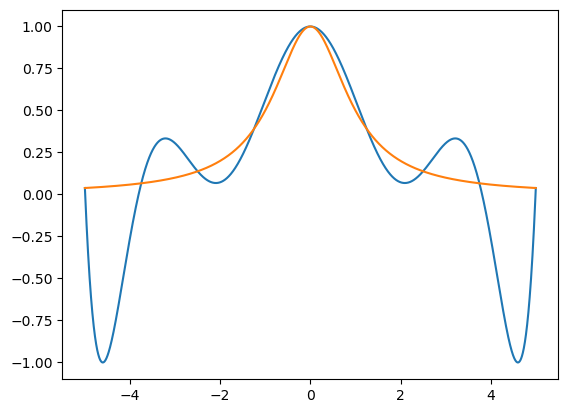

In [205]:
#Now we do Part A of problem 3 for n = 8
#Define the variable n to be 8
n=8

#Initialize the matrix containing the x values
xvals = []

#fill up the xvals array with the appropriate x values
findxvals(n)


#Initialize the matrix containing all of the lambda values
lvals = []

#fill up the lvals array with the appropriate lambda values
findlvals(n)


#Initialize the matrix that will contain all of the function values
fvals = []



#fill up the fvals array with the appropriate function values
findfvals(n,myfunc)

#graph the function and its approximation
graph(5000,myfunc)


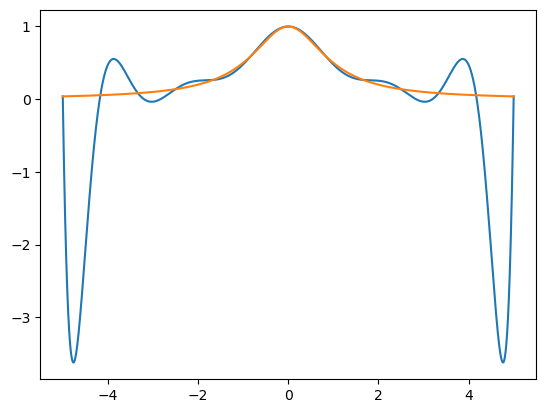

In [206]:
#Now we do Part A of the problem for n = 12
#Define the variable n to be 12
n=12

#Initialize the matrix containing the x values
xvals = []

#fill up the xvals array with the appropriate x values
findxvals(n)


#Initialize the matrix containing all of the lambda values
lvals = []

#fill up the lvals array with the appropriate lambda values
findlvals(n)


#Initialize the matrix that will contain all of the function values
fvals = []



#fill up the fvals array with the appropriate function values
findfvals(n,myfunc)

#graph the function and its approximation
graph(5000,myfunc)

Here, we notice that the approximation to the function is not very accurate. There appear to be many bumps in the approximation that are simply not present in the actual graph of $f(x) = \frac{1}{1+x^2}$. As we increase $n$, the approximation appears to get better for small $x$, but it certainly does not appear to uniformly converge.

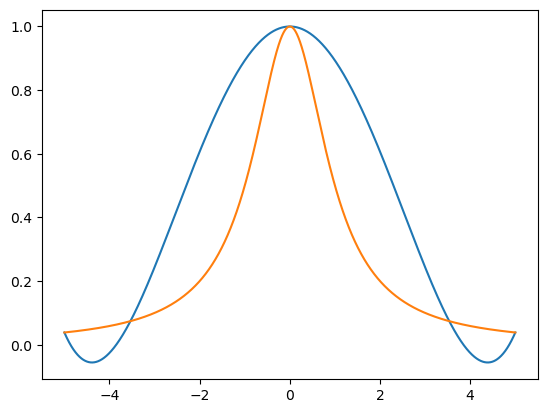

In [208]:
#Now we do Part B of Problem 3


#Since the points are not equidistributed, we need to define new functions to find the x values and the lambda values
#Here we are defining a function to find the x values for when the points are not equidistributed
def findxvals2(n):
    #Fill up the matrix xvals with appropriate values of x
    for x in range(0,n+1):
        xvals.append(5*math.cos((x*math.pi)/n))

#We must do a slightly different procedure to obtain the lambda values this time since the points are not equidistributed
#Here we define the function to find the lambda values when the points are not equidistributed
def findlvals2(n):
    lvals.append(1/2)
    for x in range(1,n):
        lvals.append((-1)**x)
    
    lvals.append((-1)**n/2)


#First we set n to be equal to 4
n = 4

#Initialize the matrix xvals
xvals = []



#Call the function so that xvals has the appropriate x values
findxvals2(n)


#Initialize the matrix containing the lambda values
lvals = []


#Call the function so that lvals has the appropriate lambda values
findlvals2(n)


#Initialize the matrix that will contain all of the function values
fvals = []

#Call the function so that fvals contains the appropriate function values
findfvals(n,myfunc)

#graph the function and its approximation
graph(5000,myfunc)

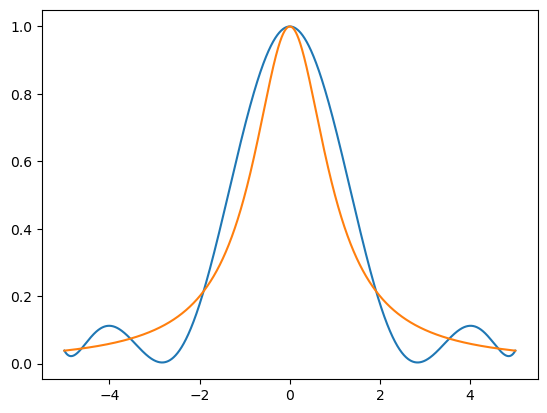

In [209]:
#Next we set n to be equal to 8
n = 8

#Initialize the matrix xvals
xvals = []

#Call the function so that xvals has the appropriate x values
findxvals2(n)

#initialize the matrix containing the lambda values
lvals = []

#Call the function so that lvals has the appropriate lambda values
findlvals2(n)

#Initialize the matrix that will contain all of the function values
fvals = []

#Call the function so that fvals contains the appropriate function values
findfvals(n,myfunc)

#graph the function and its approximation
graph(5000,myfunc)

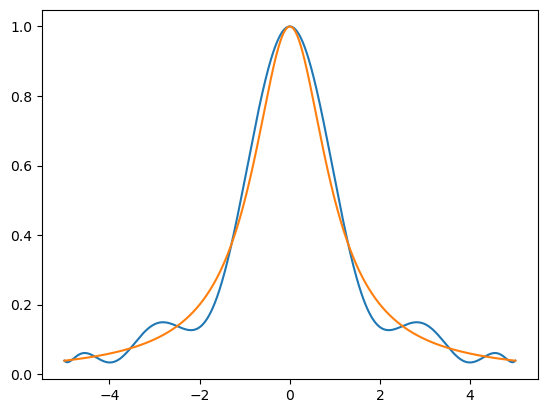

In [210]:
#Next we set n to be equal to 12
n = 12

#Initialize the matrix xvals
xvals = []

#Call the function so that xvals has the appropriate x values
findxvals2(n)

#initialize the matrix containing the lambda values
lvals = []

#Call the function so that lvals has the appropriate lambda values
findlvals2(n)

#Initialize the matrix that will contain all of the function values
fvals = []

#Call the function so that fvals contains the appropriate function values
findfvals(n,myfunc)

#graph the function and the approximation
graph(5000,myfunc)

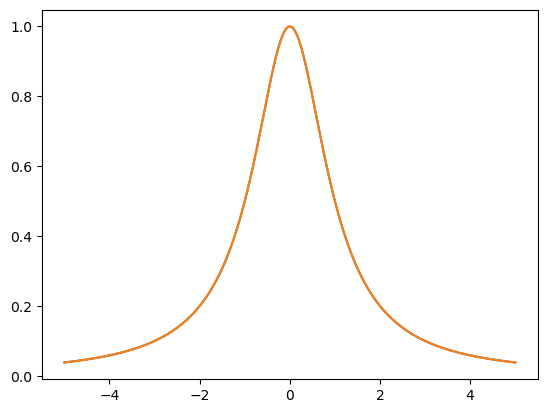

In [211]:
#Finally we set n to be equal to 100
n = 100

#Initialize the matrix xvals
xvals = []

#Call the function so that xvals has the appropriate x values
findxvals2(n)

#initialize the matrix containing the lambda values
lvals = []

#Call the function so that lvals has the appropriate lambda values
findlvals2(n)

#Initialize the matrix that will contain all of the function values
fvals = []

#Call the function so that fvals contains the appropriate function values
findfvals(n,myfunc)

#graph the function and the approximation
graph(5000, myfunc)

Again, we notice that the interpolation is not very accurate for small $n$. However, in stark contrast to Part $A$, we notice that for large $n$, the interpolation is very accurate and nearly matches the function itself. Furthermore, the approximation appears to uniformly converge. Thus, we may deduce that how we choose the nodes for interpolation does make a large difference in how accurate the approximation is. 

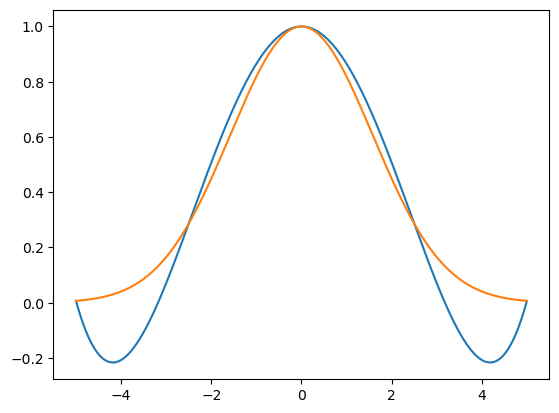

In [213]:

#We define the new function necessary for Part C of Problem 3. This takes the input x and returns the value of the function as output.
def myfunc2(val):
    return math.exp(-1*val**2/5)

#First we do the approximation with n = 4

#Define the variable n to be 4
n=4

#Initialize the matrix containing the x values
xvals = []

#fill up the xvals array with the appropriate x values. Here we use the function findxvals instead of findxvals2 because we are
#assuming that the points are equidistributed
findxvals(n)


#Initialize the matrix containing all of the lambda values
lvals = []

#fill up the lvals array with the appropriate lambda values. Again we use the function findlvals instead of findlvals2 because
#we assume that the points are equidistributed
findlvals(n)


#Initialize the matrix that will contain all of the function values
fvals = []



#fill up the fvals array with the appropriate function values. Notice that we use myfunc2 instead of myfunc for Part C of this problem.
findfvals(n,myfunc2)

#Create the graph with 5000 points
graph(5000,myfunc2)

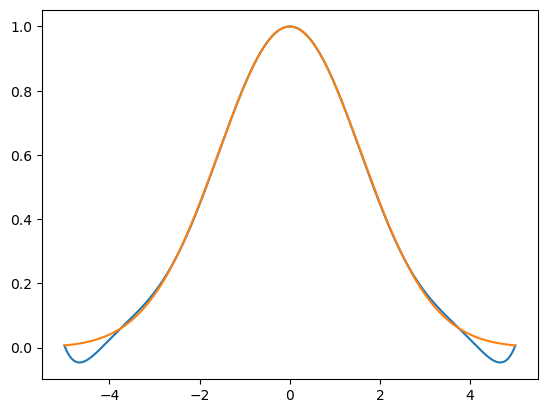

In [214]:
#Next we do the approximation for Part C of Problem 3 with n = 8

#Define the variable n to be 8
n=8

#Initialize the matrix containing the x values
xvals = []

#fill up the xvals array with the appropriate x values. 
findxvals(n)


#Initialize the matrix containing all of the lambda values
lvals = []

#fill up the lvals array with the appropriate lambda values. 
findlvals(n)


#Initialize the matrix that will contain all of the function values
fvals = []

#fill up the fvals array with the appropriate function values.
findfvals(n,myfunc2)

#Create the graph with 5000 points
graph(5000,myfunc2)

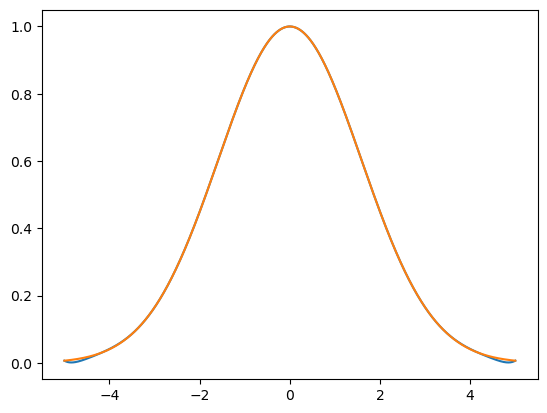

In [215]:
#Finally we do the approximation for Part C of Problem 3 with n = 12

#Define the variable n to be 12
n=12

#Initialize the matrix containing the x values
xvals = []

#fill up the xvals array with the appropriate x values. 
findxvals(n)


#Initialize the matrix containing all of the lambda values
lvals = []

#fill up the lvals array with the appropriate lambda values. 
findlvals(n)


#Initialize the matrix that will contain all of the function values
fvals = []



#fill up the fvals array with the appropriate function values.
findfvals(n,myfunc2)

#Create the graph with 5000 points
graph(5000,myfunc2)

In this case, we notice that as we increase $n$, the approximations uniformly converge to the actual function. This is in stark contrast to Part $A$, where we found that the approximations did not uniformly converege. Interestingly, in both cases, we used the same set of nodes. Thus, we find that the accuracy of the interpolation depends both on the nodes that we use and the function that we are approximating.